> Complementaria métodos computacionales 1
>
> Semana 04

***

Para este ejercicio descargue de bloque neón el archivo de datos `datos_04.npz`, que contiene tres arrays: $x$, $y$, y $y_true$.

$y$ contiene datos con ruido y $y_{true}$ contiene los datos sin ruido.

# 1) Importar y graficar

* Importe los datos usando `np.load` (0.5pt)

* Grafique la función con ruido ($y$ vs $x$) como un scatter, y encima, de color rojo, la función sin riudo ($y_{true}$ vs $x$) (0.5pt)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

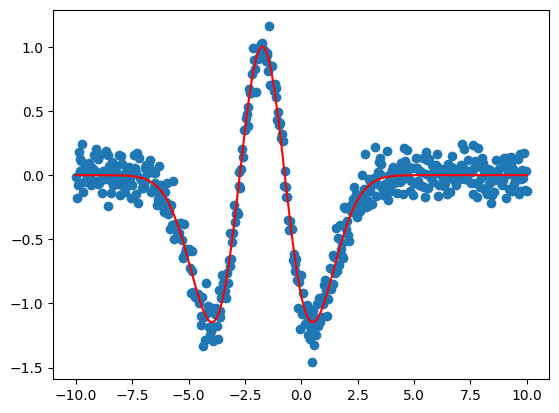

In [12]:
datos = np.load("datos_04.npz")

x = datos["x"]
y = datos["y"]
y_true = datos["y_true"]

plt.scatter(x,y)
plt.plot(x,y_true,color = "red")

# 2)

* Use diferencias finitas (centrales) para calcular la derivada de estos datos, tanto $y$ como $y_{true}$. Grafique ambas derivadas y compare. (1pt)
    * EXTRA: use un esquema de cinco puntos (0.5pt)
* No use ningún loop (`map`, `while`, `zip`, `for`) en este punto de su código. (1pt)

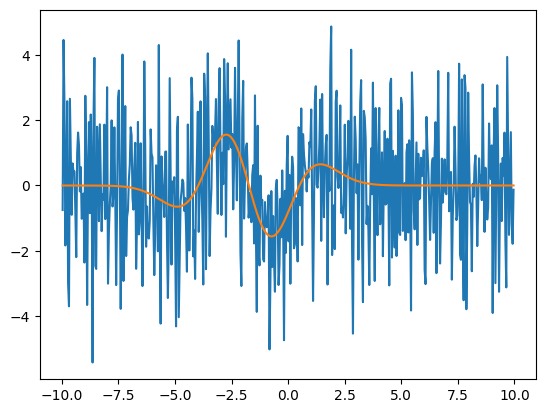

In [13]:
dydx = (y[2:]-y[:-2])/(x[2:]-x[:-2])
dy_truedx = (y_true[2:]-y_true[:-2])/(x[2:]-x[:-2])

plt.plot(x[1:-1],dydx)
plt.plot(x[1:-1],dy_truedx)

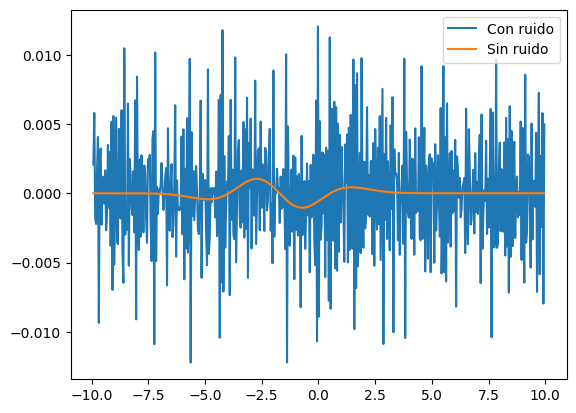

In [14]:
#extra

h = x[1]-x[0]
dydx_extra = (-y[3:]+(8*(y[2:-1]))-(8*(y[1:-2]))+y[:-3])/12*h
dydx_true_extra = (-y_true[3:]+(8*(y_true[2:-1]))-(8*(y_true[1:-2]))+y_true[:-3])/12*h

plt.plot(x[2:-1],dydx_extra, label = "Con ruido")
plt.plot(x[2:-1],dydx_true_extra, label = "Sin ruido")
plt.legend()

# 3)

* Use algún filtro para suavizar los datos $y$ (1pt). Algunas ideas para esto son:
    * `scipy.dnimage.gaussian_filter1d`
    * `scipy.dnimage.uniform_filter`
    * `scipy.signal.savgol_filter`

* Calcule de nuevo la derivada, y compárela de nuevo con la derivada de $y_{true}$. (1pt)

* EXTRA: para alguno de estos filtros, grafique la suma de diferencias al cuadrado (RSS) entre la derivada de la función suavizada y la derivada real, como función del parámetro del filtro (sea sigma, ancho de ventana, etc)

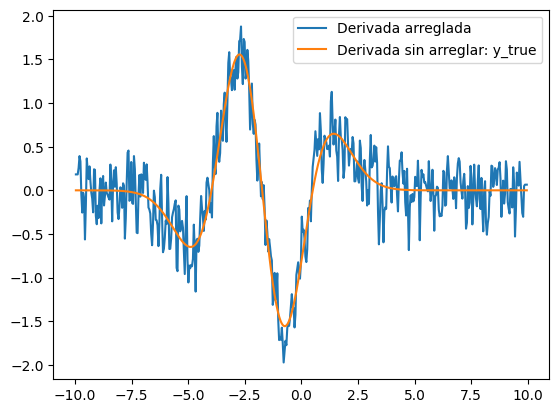

In [15]:
y_arreglado = scipy.signal.savgol_filter(y,10,1)
dydx_arreglado = (y_arreglado[2:]-y_arreglado[:-2])/(x[2:]-x[:-2])

plt.plot(x[1:-1],dydx_arreglado,label = "Derivada arreglada")
plt.plot(x[1:-1],dy_truedx,label = "Derivada sin arreglar: y_true")
plt.legend()


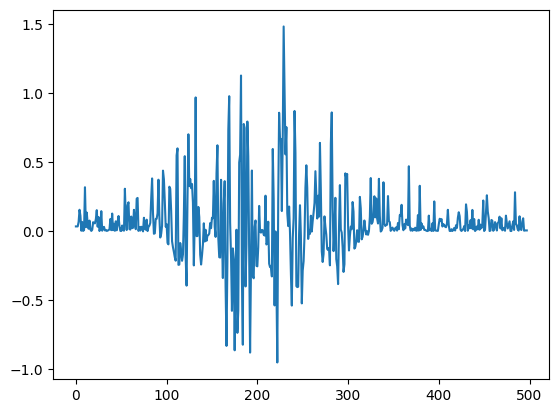

In [16]:
#extra
suma_dif = dydx_arreglado**2 - dy_truedx**2

plt.plot(suma_dif)
